In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def H_f(r,n,l,QD):
    """This function is used to define the potential part of the radial wave equation for an atom 
    r is the radius
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect"""
    if r==0: # when radius is 0 from the center nuclear, the probability wavefunction for electron is 0.
        return 0
    else: 
        return -l*(l+1)/(r*r)+2/r-1/((n-QD)*(n-QD))

In [3]:
def SBS_method(fun,N,h,n,l,QD):
    """Step by step method can find the result of second order differential equation
    fun is the potential function of an atom
    N is the total number of the points
    h is the interval between two neibouring points
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect"""
    total_x= N*h #the furtherest distance between the electron and the nuclear
    x = np.linspace(0,total_x,N+1) # each radial point on the x direction
    retval = np.zeros((N+1)) 
    H_f = np.zeros((N+1))
    retval[0] = 0 # boundary condition: when r=0, the probability of the electron is 0.
    retval[1] = 0.1 # boundary condition
    r=0 # start with radius is equal to 0
    for i in range(1,N):
        r+= h
        H_f[i]=fun(r,n,l,QD) # find the potential part of the radial wavefunction
    for j in range(1,N):
        retval[j+1]=((2-10*h*h*H_f[j]/12)*retval[j]- (1+h*h*H_f[j-1]/12)*retval[j-1])/( 1+h*h*H_f[j+1]/12)
    return x,retval

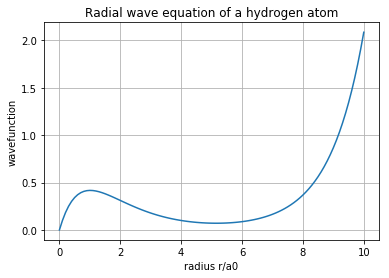

In [5]:
def Plot(x,y,title):
    """Plot the wavefunction"""
    plt.plot(x,y)
    plt.xlabel('radius r/a0')
    plt.ylabel('wavefunction')
    plt.title(title)
    plt.grid()
wave=SBS_method(H_f,100,0.1,1,0,0)
Plot(wave[0],wave[1],'Radial wave equation of a hydrogen atom')

In [7]:
def RV_SBS_method(fun,N,h,n,l,QD):
    """Step by step method can find the result of second order differential equation
    fun is the potential function of an atom
    N is the total number of the points
    h is the interval between two neibouring points
    n is the principle quantum number
    l is the orbital angular momentum quantum number
    QD is the quantum defect"""
    total_x= N*h #the furtherest distance between the electron and the nuclear
    x = np.linspace(total_x,0,N+1) # each radial point on the x direction
    retval = np.zeros((N+1)) 
    H_f = np.zeros((N+1))
    retval[0] = 0 # boundary condition: when r=0, the probability of the electron is 0.
    retval[1] = 0.1 # boundary condition
    r=10 # start with radius is equal to 0
    for i in range(1,N):
        r-= h
        H_f[i]=fun(r,n,l,QD) # find the potential part of the radial wavefunction
    for j in range(1,N):
        retval[j+1]=((2-10*h*h*H_f[j]/12)*retval[j]- (1+h*h*H_f[j-1]/12)*retval[j-1])/( 1+h*h*H_f[j+1]/12)
    return x,retval

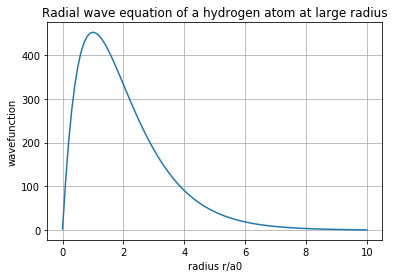

In [8]:
wave2=RV_SBS_method(H_f,100,0.1,1,0,0)
Plot(wave2[0],wave2[1],'Radial wave equation of a hydrogen atom at large radius')

Now, find the differentiation of each point from the two graphs using central first order finite-difference method

In [9]:
h = 0.05
diff_wave = (np.roll(wave[1],-1) - np.roll(wave[1],1))/(2*h) # first derivative of the wave function
NM_diff_wave=diff_wave[1:100]/wave[1][1:100] # Normallise the first derivative of the wave function to get rid of the constant

RE_wave2=(wave2[1][::-1]) # reversed wave function 2
RE_diff_wave2 = (np.roll(RE_wave2,-1) - np.roll(RE_wave2,1))/(2*h)# reversed first derivative of the wave function 2
RE_NM_diff_wave2=RE_diff_wave2[1:100]/RE_wave2[1:100] # normallised and reversed first derivative of the wave function


Plotiing the continuity graph to find the minimum point 

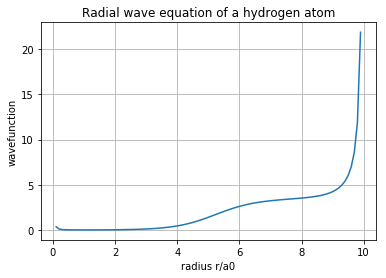

In [10]:
continuity=NM_diff_wave-RE_NM_diff_wave2 # the first term has division by 0, so it is excluded in calculation
Plot(wave[0][1:100],abs(continuity),'Radial wave equation of a hydrogen atom')

Find the order of the term coresponding to the lowest value in the 'continuity' array

In [11]:
mini_value=np.min(abs(continuity))
intersection=np.where(abs(continuity)==mini_value)

if len(intersection)>0 and len(intersection[0])>0:
    POI=intersection[0][0] #point of intersection
    print('The first index of element with this minimum value is',POI)

# we have found that the intersection point is when N=19+1=20, because the first term of the 'continuity' array was removed.
wave3=np.concatenate([wave[1][0:POI+1],RE_wave2[POI+1:101]])

The first index of element with this minimum value is 9


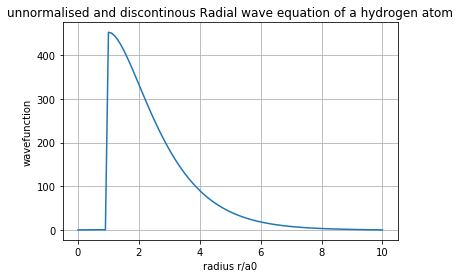

In [12]:
Plot(wave[0],wave3,'unnormalised and discontinous Radial wave equation of a hydrogen atom')

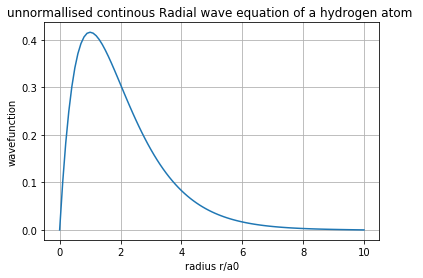

In [13]:
constant1=wave[1][POI]/RE_wave2[POI]
RE_wave2_constant1=RE_wave2*constant1
UN_Pnl=np.concatenate([wave[1][0:POI+1],RE_wave2_constant1[POI+1:101]])# unnormallised wavefunction
Plot(wave[0],UN_Pnl,'unnormallised continous Radial wave equation of a hydrogen atom ')

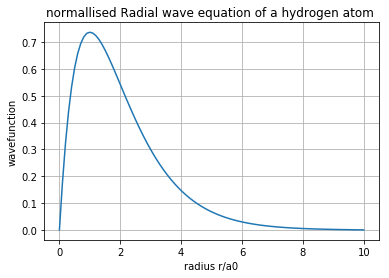

In [14]:
import scipy
from scipy import integrate
UN_Pnl_square=UN_Pnl*UN_Pnl
constant2_squared=integrate.simps(UN_Pnl_square,wave[0])
constant2=np.sqrt(constant2_squared)
Pnl=UN_Pnl/constant2
Plot(wave[0],Pnl,'normallised Radial wave equation of a hydrogen atom ')